# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [226]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [227]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [200]:
print(df['Loan_ID'].nunique())
print(df['Gender'].nunique())
print(df['Married'].nunique())
print(df['Dependents'].nunique())
print(df['Education'].nunique())
print(df['Self_Employed'].nunique())
print(df['Property_Area'].nunique())
print(df['Loan_Status'].nunique())

614
2
2
4
2
2
3
2


In [21]:
cat_feats

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [23]:
df.groupby(['Married']).count()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,,,,,,,,,,,,
No,213,210,209,213,199,213,213,206,208,199,213,213
Yes,398,388,390,398,380,398,398,384,389,362,398,398


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



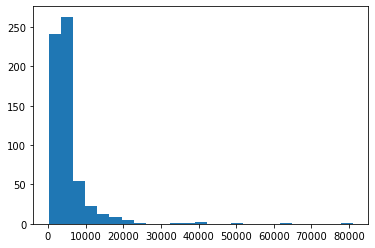

In [40]:
plt.hist(df.ApplicantIncome, bins=25)
plt.show()


Look at box plots to understand the distributions. 

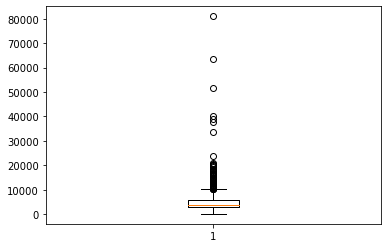

In [41]:
plt.boxplot(df.ApplicantIncome)
plt.show()

Look at the distribution of income segregated  by `Education`

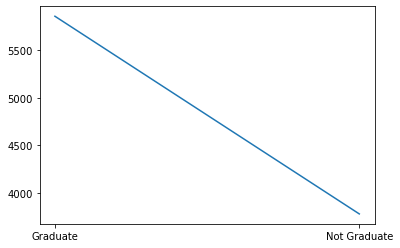

In [42]:
plt.plot(df.groupby('Education')['ApplicantIncome'].mean())
plt.show()

Look at the histogram and boxplot of LoanAmount

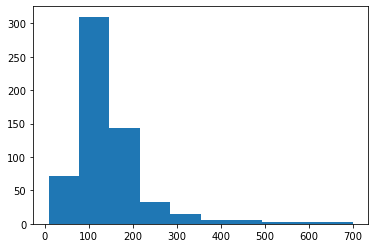

In [43]:
plt.hist(df.LoanAmount)
plt.show()

<AxesSubplot:>

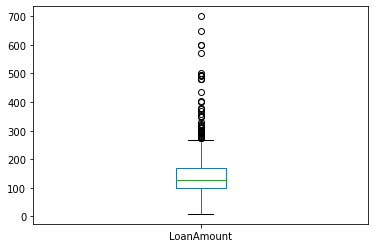

In [48]:
df.LoanAmount.plot(kind='box')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and as well as extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [228]:
table = pd.pivot_table(df,
                       values='LoanAmount',
                      index=['Education'],
                      columns=['Loan_Status'],
                      aggfunc='count')
table

Loan_Status,N,Y
Education,,
Graduate,134,331
Not Graduate,47,80


In [60]:
table = pd.pivot_table(df,
                       values='LoanAmount',
                      index=['Loan_Status'],
                      columns=['Gender'],
                      aggfunc='count')
table

Gender,Female,Male
Loan_Status,,
N,36,140
Y,73,330


In [194]:
table = pd.pivot_table(df,
                       values='LoanAmount',
                      index=['Self_Employed'],
                      columns=['Loan_Status'],
                      aggfunc='count')
table

Loan_Status,N,Y
Self_Employed,,
No,148,334
Yes,25,54


In [645]:
table = pd.pivot_table(df,
                       values='LoanAmount',
                      index=['Credit_History'],
                      columns=['Loan_Status'],
                      aggfunc='count')
table

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [219]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [229]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
# Impute missing values for Gender
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
# Impute missing values for Gender
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
# Fill Loan_Amount_Term with mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [230]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

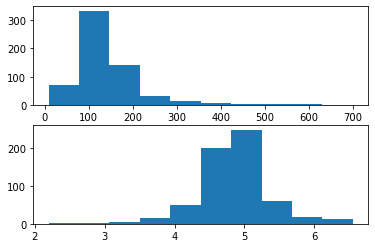

In [203]:
fig, ax = plt.subplots(2)
ax[0].hist(df['LoanAmount'])
ax[1].hist(df['LoanAmount_log'])
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [231]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [232]:
df['Total_Income_log'] = np.log(df['Total_Income'])

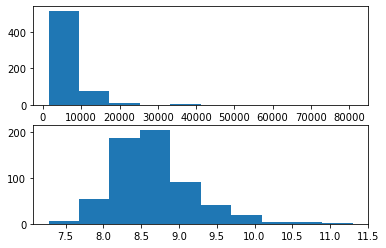

In [206]:
fig, ax = plt.subplots(2)
ax[0].hist(df['Total_Income'])
ax[1].hist(df['Total_Income_log'])
plt.show()

## 4. Building a Predictive Model

In [462]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


Setup X and y

In [626]:
X = df.drop(['Loan_Status', 'Loan_ID', 'Total_Income', 'LoanAmount'], axis=1)
y = df['Loan_Status']

Get dummy variables

In [627]:
df_dummy = pd.get_dummies(X[cat_feats]).reset_index()
X.reset_index(inplace=True)
X = pd.merge(X, df_dummy)
X.drop(cat_feats, axis=1, inplace=True)
X.drop('index', axis=1, inplace=True)

In [396]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,4.986426,5849.0,8.674026,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,0,1,...,0,0,0,1,0,1,0,0,0,1


In [628]:
# standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']] = scaler.fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])

In [531]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']] = scaler.fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])

In [629]:
X_scale = X.copy()

In [630]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(k=10)
X_new = skb.fit_transform(X_scale, y)

Split data into training and testing

In [631]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=101)

Model Fitting

In [632]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Check model scores

In [633]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 0.7297297297297297


In [636]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, rfc_pred)
cnf_matrix

array([[ 27,  37],
       [ 13, 108]], dtype=int64)

In [635]:
metrics.roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])

0.7112603305785123

<AxesSubplot:>

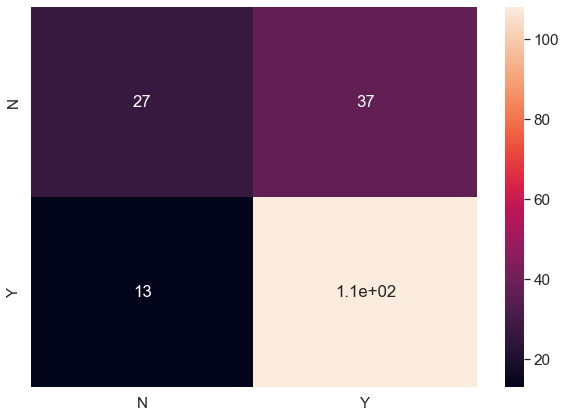

In [637]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cnf_matrix, index = ['N', 'Y'],
                  columns = ['N', 'Y'])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True)

<AxesSubplot:>

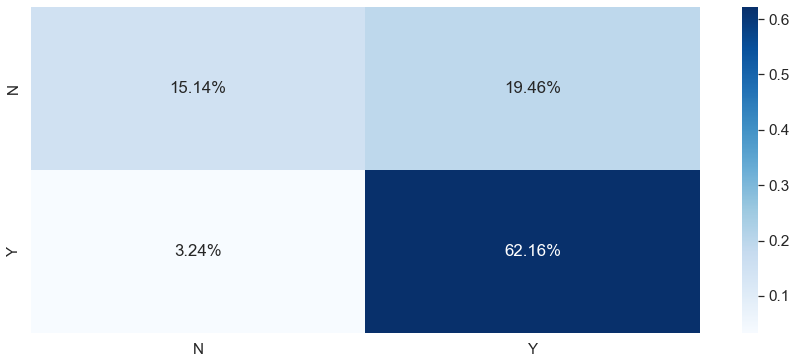

In [610]:
sns.heatmap(df_cm/np.sum(cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

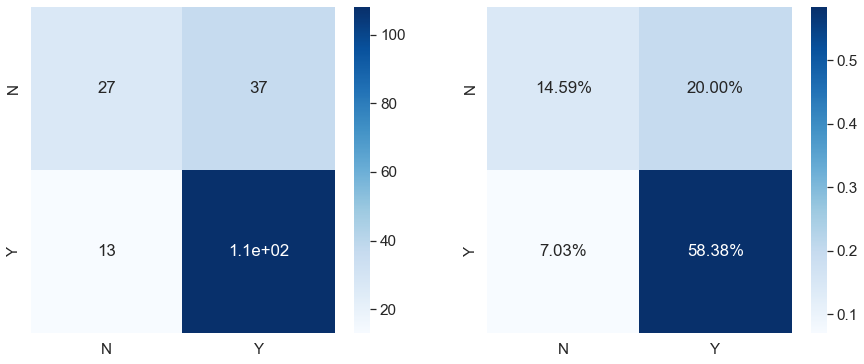

In [640]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (15,6)

# sn.set(font_scale=1.4) # for label size
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(df_cm, annot=True, cmap='Blues', ax=ax1)
sns.heatmap(df_cm/np.sum(cnf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax2)
plt.show()

### Feature Importance

In [492]:
X_new

,Credit_History,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban
0,1.0,1,0,0,0
1,1.0,0,1,1,0
2,1.0,0,1,0,0
3,1.0,0,1,0,0
4,1.0,1,0,0,0
...,...,...,...,...,...
609,1.0,1,0,1,0
610,1.0,0,1,1,0
611,1.0,0,1,0,0
612,1.0,0,1,0,0


In [639]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_scale.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

ValueError: Length of passed values is 10, index implies 21.

In [358]:
feature_names = [f'feature {i}' for i in range(X_train.shape[1])]

In [359]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


In [361]:
X_train.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,LoanAmount_log,Total_Income,Married_No,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
416,0.0,160.000000,360.0,5.075174,2600.0,1,0,1,0,0,1,0,0,0,1
338,0.0,146.412162,360.0,4.986426,1830.0,1,0,0,0,1,0,1,0,0,1
288,0.0,115.000000,360.0,4.744932,4124.0,1,0,0,0,0,1,0,0,1,0
314,1843.0,159.000000,360.0,5.068904,4316.0,0,1,0,0,0,1,0,1,0,0
181,5063.0,67.000000,360.0,4.204693,6979.0,1,0,0,0,0,1,0,1,0,0


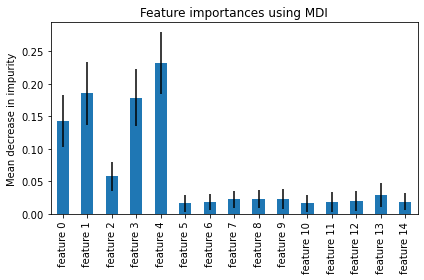

In [459]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Try paramater grid search to improve the results

In [349]:
from sklearn.model_selection import GridSearchCV

# Create a classifier object with the classifier and parameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 5, 8, 10, 12, 15, 20],
    'n_estimators': [1, 2, 3, 4, 5, 6, 7]
}

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10, 12, 15, 20],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7]})

In [350]:
clf.best_params_

{'max_depth': 3, 'n_estimators': 3}

In [351]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.5524922520661157

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import FeatureUnion

In [69]:
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
# creating target variable
y = df["Loan_Status"]
X = df.drop(["Loan_Status","Loan_ID"],axis = 1)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [71]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
X_train.isnull().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     10
Credit_History       32
Property_Area         0
dtype: int64

### Split Num/Cat feats

In [73]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

### Replace Null Values

In [10]:
X_train.isna().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     10
Credit_History       32
Property_Area         0
dtype: int64

In [125]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self
    
to_dense = ToDenseTransformer()

In [124]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
selection = SelectKBest(k=3)
pca = PCA(n_components=3)

In [137]:
from sklearn.compose import ColumnTransformer

# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', pca)
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=False))
])

# Define numerical pipeline
num_pipe1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_feats),
    ('num', num_pipe, ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']),
     ('num1', num_pipe1, ['Loan_Amount_Term'])
])

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
log_reg = LogisticRegression()

In [157]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('rfc', rfc)])

In [158]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=3))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                        

In [159]:
# make predictions
y_pred = model.predict(X_test)

In [641]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Accuracy: 0.7135135135135136


array([[ 19,  45],
       [  8, 113]], dtype=int64)

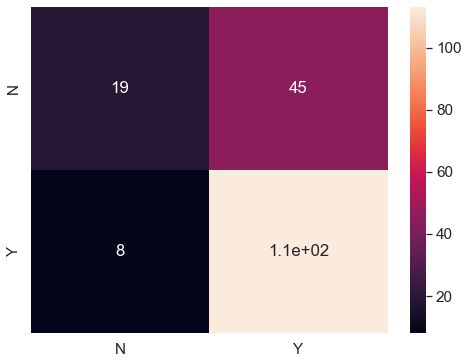

In [644]:
df_cm = pd.DataFrame(cnf_matrix, index = ['N', 'Y'],
                  columns = ['N', 'Y'])
plt.figure(figsize = (8,6))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True)
plt.show()

### Perform Grid Search

In [167]:
from sklearn.model_selection import GridSearchCV
# set up our parameters grid
param_grid = {"preprocessor__cat__pca__n_components": [2, 3, 4],
                  "rfc__max_depth":[2, 3, 5, 6, 8]}

# create a Grid Search object
grid_search = GridSearchCV(model, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START preprocessor__cat__pca__n_components=2, rfc__max_depth=2...


ValueError: Invalid parameter rfc for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=3))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term'])])),
                ('model', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

### Add Total Income Feature

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class NewVariablesAdder(BaseEstimator, TransformerMixin):
    
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#     # Make a new variable that is rating divided by number of reviews
#         Total_Income = X['ApplicantIncome'] + X['CoapplicantIncome']
#         return np.c_[X, Total_Income]

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [168]:
import pickle

In [169]:
pickle.dump(model, open( "model.p", "wb" ) )

In [170]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
416,Female,No,1,Graduate,No,2600,0.0,160.0,360.0,1.0,Urban
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
288,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural
181,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural


In [185]:
json_data = {'Gender': 'Female',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3500.0,
 'CoapplicantIncome': 4000.0,
 'LoanAmount': 160.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [186]:
import requests
URL = "http://127.0.0.1:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [187]:
print(r.json())

[[0.27, 0.73]]
